In [4]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 5.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import xgboost
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [8]:

model = xgboost.XGBRegressor()

In [10]:
data = pd.read_csv("game_difference.csv")

In [34]:
data = data.drop(axis = 1, columns=["Unnamed: 0"])

In [36]:
cor = data.corr()

<AxesSubplot:>

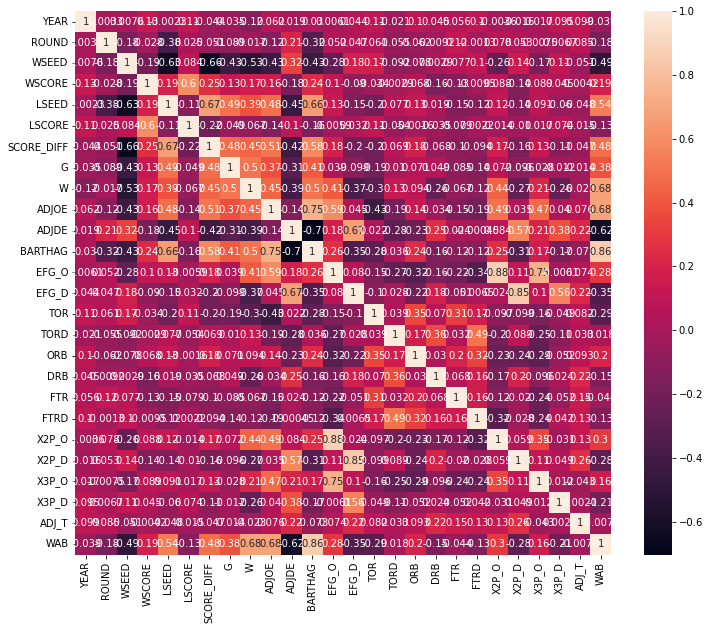

In [37]:
f, ax = plt.subplots(figsize=(12, 10))
#
# Generate a mask for upper traingle
#
#mask = np.triu(np.ones_like(cor, dtype=bool))
#
# Configure a custom diverging colormap
#
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(cor, annot=True)

In [38]:
cor

,YEAR,ROUND,WSEED,WSCORE,LSEED,LSCORE,SCORE_DIFF,G,W,ADJOE,...,ORB,DRB,FTR,FTRD,X2P_O,X2P_D,X3P_O,X3P_D,ADJ_T,WAB
YEAR,1.000000,0.003250,0.007638,0.131184,-0.002306,0.109148,-0.044190,-0.034628,-0.120918,0.062311,...,0.100729,0.044596,0.056029,0.104562,-0.003627,-0.015923,0.017007,0.095225,0.098975,-0.038825
ROUND,0.003250,1.000000,-0.177800,-0.028454,-0.381448,0.025039,-0.050929,-0.088656,-0.016587,-0.122093,...,-0.061553,-0.009242,0.115329,-0.001281,0.077935,0.053388,-0.007498,0.006675,0.085323,-0.175811
WSEED,0.007638,-0.177800,1.000000,-0.193477,-0.631830,0.084055,-0.664186,-0.432639,-0.530467,-0.434442,...,-0.078120,0.002869,0.077496,0.101801,-0.264590,0.144025,-0.169152,0.114438,-0.050774,-0.489309
WSCORE,0.131184,-0.028454,-0.193477,1.000000,0.191864,0.596722,0.250490,0.127973,0.165612,0.160164,...,0.068201,-0.160821,-0.131005,-0.009518,0.087595,-0.137525,0.088958,0.045492,-0.004248,0.187013
LSEED,-0.002306,-0.381448,-0.631830,0.191864,1.000000,-0.112898,0.668871,0.492106,0.386427,0.484786,...,0.133597,0.019496,-0.148003,-0.120335,0.124130,-0.136828,0.090841,-0.059528,-0.047662,0.537367
LSCORE,0.109148,0.025039,0.084055,0.596722,-0.112898,1.000000,-0.215799,-0.049157,-0.067101,-0.141894,...,-0.001609,-0.035465,-0.079383,0.002180,-0.013768,-0.010269,0.017105,0.073866,-0.015456,-0.128657
SCORE_DIFF,-0.044190,-0.050929,-0.664186,0.250490,0.668871,-0.215799,1.000000,0.479437,0.447223,0.509851,...,0.178798,-0.068038,-0.100018,-0.093846,0.169656,-0.164988,0.126376,-0.105892,-0.046638,0.481994
G,-0.034628,-0.088656,-0.432639,0.127973,0.492106,-0.049157,0.479437,1.000000,0.503646,0.372919,...,0.071289,0.048555,-0.085198,-0.143764,0.071772,-0.096459,-0.027839,-0.011900,-0.013950,0.382134
W,-0.120918,-0.016587,-0.530467,0.165612,0.386427,-0.067101,0.447223,0.503646,1.000000,0.451051,...,0.094285,-0.257832,-0.067188,-0.115459,0.436337,-0.269512,0.210772,-0.258872,-0.023448,0.680573
ADJOE,0.062311,-0.122093,-0.434442,0.160164,0.484786,-0.141894,0.509851,0.372919,0.451051,1.000000,...,0.140065,-0.033619,-0.153514,-0.192609,0.492369,0.035032,0.470266,0.040103,0.076080,0.682646


In [45]:
for col in cor.columns:
    for i in cor.columns:
        if abs(cor.loc[i,col]) >= .7:
            print(i,col) 

YEAR YEAR
ROUND ROUND
WSEED WSEED
WSCORE WSCORE
LSEED LSEED
LSCORE LSCORE
SCORE_DIFF SCORE_DIFF
G G
W W
ADJOE ADJOE
BARTHAG ADJOE
ADJDE ADJDE
BARTHAG ADJDE
ADJOE BARTHAG
ADJDE BARTHAG
BARTHAG BARTHAG
WAB BARTHAG
EFG_O EFG_O
X2P_O EFG_O
X3P_O EFG_O
EFG_D EFG_D
X2P_D EFG_D
TOR TOR
TORD TORD
ORB ORB
DRB DRB
FTR FTR
FTRD FTRD
EFG_O X2P_O
X2P_O X2P_O
EFG_D X2P_D
X2P_D X2P_D
EFG_O X3P_O
X3P_O X3P_O
X3P_D X3P_D
ADJ_T ADJ_T
BARTHAG WAB
WAB WAB


In [41]:
type(cor)

pandas.core.frame.DataFrame

In [48]:
no_corr_data = data.drop(axis = 1, columns = ["BARTHAG", "EFG_O","EFG_D"])

In [67]:
train_data = no_corr_data[no_corr_data["YEAR"]<= 2018]
test_data = no_corr_data[no_corr_data["YEAR"]> 2018]

In [68]:
X_train = train_data.drop(axis =1, columns = ["SCORE_DIFF","WTEAM", "LTEAM","confW","confL"])

In [69]:
X_test = test_data.drop(axis =1, columns = ["SCORE_DIFF","WTEAM", "LTEAM","confW","confL"])

In [70]:
Y_test = test_data["SCORE_DIFF"]

In [71]:
Y_train =train_data["SCORE_DIFF"]

In [72]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [65]:
X_train.dtypes

YEAR        int64
ROUND       int64
WSEED       int64
WTEAM      object
WSCORE      int64
LSEED       int64
LTEAM      object
LSCORE      int64
confW      object
confL      object
G           int64
W           int64
ADJOE     float64
ADJDE     float64
TOR       float64
TORD      float64
ORB       float64
DRB       float64
FTR       float64
FTRD      float64
X2P_O     float64
X2P_D     float64
X3P_O     float64
X3P_D     float64
ADJ_T     float64
WAB       float64
dtype: object